# Exercício

# Kmeans

**Segmentação de Clientes com K-Means**

**Arquivo Mall_Customers.csv**

**Passos:**

1. Carregue o conjunto de dados de clientes de um arquivo CSV usando a biblioteca pandas.
2. Explore e visualize os dados para entender suas características e distribuição.
3. Selecione as colunas relevantes para a segmentação, como idade, renda anual e gastos anuais.
4. Pré-processe os dados, se necessário (normalização, tratamento de valores ausentes, etc.).
5. Importe a classe `KMeans` da biblioteca scikit-learn.
6. Inicialize o modelo K-Means com um número de clusters desejado.
7. Treine o modelo usando os dados pré-processados.
8. Obtenha os rótulos de cluster para cada cliente no conjunto de dados.
9. Analise e interprete os clusters resultantes.
10. Visualize os clusters para entender como os clientes estão agrupados.
11. Explore diferentes números de clusters para encontrar a melhor segmentação.


In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [128]:
# Palettes
DEEP = 'deep'
MUTED = 'muted'
BRIGHT = 'bright'
PASTEL = 'pastel'
DARK = 'dark'
COLORBLIND = 'colorblind'

In [129]:
# Load
data = pd.read_csv('./../../Datasets/Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [130]:
# Clean
data.drop(data.columns[0], axis=1, inplace=True)
data['Genre'] = data.Genre.map({'Male': 1, 'Female': 0})


In [131]:
# Check duplicates
data.duplicated().sum()

0

In [132]:
# Check missings
data.isnull().sum().sum()

0

In [133]:
# Check balance
for feature in data.columns:
    print(feature)
    data[feature].hist()
    plt.ioff()

Genre
Age
Annual_Income_(k$)
Spending_Score


## Correlação

In [134]:
corr_matrix = data.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,Genre,Age,Annual_Income_(k$),Spending_Score
Genre,1.000000,0.060867,0.056410,-0.058109
Age,0.060867,1.000000,-0.012398,-0.327227
Annual_Income_(k$),0.056410,-0.012398,1.000000,0.009903
Spending_Score,-0.058109,-0.327227,0.009903,1.000000


__OBJETIVO:__ é categorizar em grupos, rotular por semelhança/distância 

In [135]:
def normalize(x_):
    # Reshape your data either using array.reshape(-1, 1) if your data has a single feature 
    # or array.reshape(1, -1) if it contains a single sample.

    scaler = StandardScaler()
    x_ = np.array(x_.values).reshape(-1,1)
    reshaped = scaler.fit_transform(x_).reshape(1,-1)[0]

    return reshaped

data = data.apply(lambda x: normalize(x))


In [136]:

model = KMeans(n_clusters=10, random_state=0, n_init="auto")
model.fit(data)


data['Cluster'] = model.labels_


In [137]:
data.head()

,Genre,Age,Annual_Income_(k$),Spending_Score,Cluster
0,1.128152,-1.424569,-1.738999,-0.434801,9
1,1.128152,-1.281035,-1.738999,1.195704,9
2,-0.886405,-1.352802,-1.700830,-1.715913,1
3,-0.886405,-1.137502,-1.700830,1.040418,8
4,-0.886405,-0.563369,-1.662660,-0.395980,1


In [138]:
data.columns

Index(['Genre', 'Age', 'Annual_Income_(k$)', 'Spending_Score', 'Cluster'], dtype='object')

In [139]:
columns_analyze_01 = ['Genre', 'Age', 'Annual_Income_(k$)', 'Cluster']

columns_analyze_02 = ['Genre', 'Age', 'Spending_Score', 'Cluster']

columns_analyze_03 = ['Genre', 'Age', 'Annual_Income_(k$)', 'Spending_Score', 'Cluster']


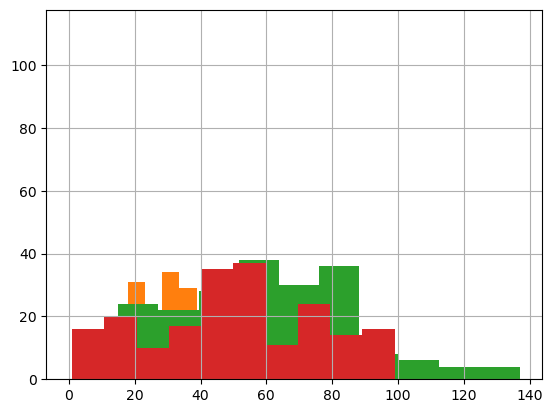

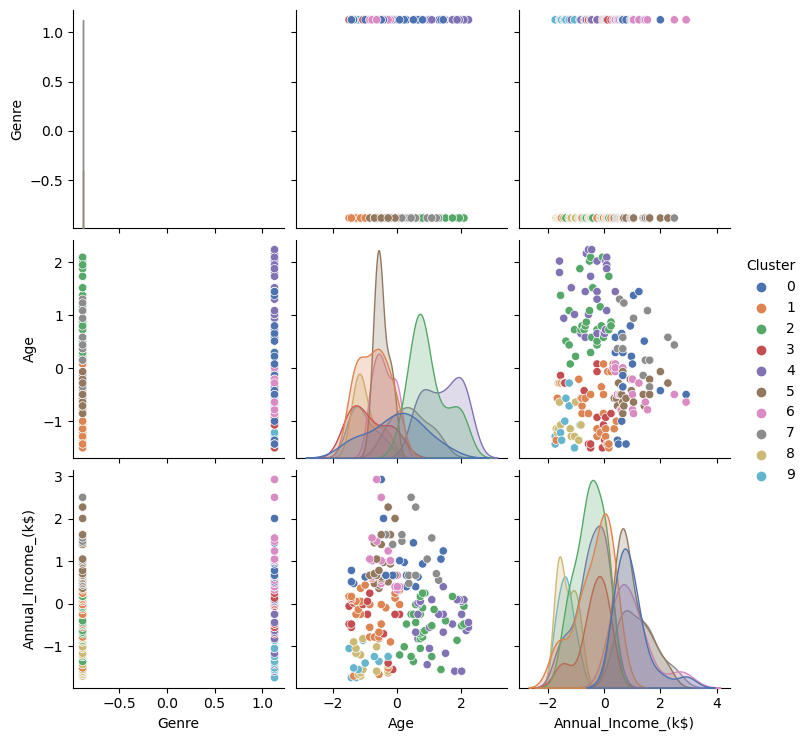

In [140]:
sns.pairplot(data[columns_analyze_01], hue='Cluster', palette=DEEP)
plt.show()